# COGS 108 - Final Project 

# Overview

In this project, we analyzed county-level results of US presidential elections from 2000-2016 and the strength of the correlation of partisan vote share with 2 factors over time. Specifically, for each year, we calculated the strength of the correlation between partisan swings with population density as well as racial diversity. This enabled us to see which factors have strongly (or less strongly) correlated over time. This will help tell if a certain variable is a better predictor of a county's vote over time and could even predict patterns in the upcoming 2020 election.

# Names

- Nancy Bui
- Jayvee Inthisone
- Katarina Stefanovic
- Allison Tietz
- Frank Zhou

# Group Members IDs

- A13669676
- A13218641
- A14084974
- A14854110
- A14672642

# Research Question

How are presidential election margins in each county correlated with county population density and racial makeup and which factors have correlated more strongly (or less) over time?

## Background and Prior Work

Presidential election results from different years show that large portions of the country have drastically changed their party allegiances over time. In swing states, those changes can be fast and volatile. For example, it can be seen that voting patterns in midwestern states has shifted from voting reliably for democratic candidates to suddenly voting for republican ones in this past election. In contrast to those changes, urban areas across the nation like the metropolitan Atlanta area and Orange County, California have traditionally backed Republican candidates, but are now voting more Democratic at the federal level. Analyzing changes in voting patterns of the United States on a county level – particularly in swing states and the so-called “rust belt” region – will provide valuable information in where candidates should focus their campaign efforts during election season. 

On a state level, some states that have voted reliably Democratic in the past are now firmly Republican, like West Virginia. On the other hand, formerly Republican states and strongholds like Virginia have now become primarily Democratic states. Appalachia and the American south have seen some of the largest swings toward Republican candidates in recent years, while the states on the coasts have seen the largest swings toward Democrats. Since the controversial 2000 presidential election, some states have gone back and forth each election cycle. Many states have “pivot counties,” which may be a deciding factor in how a state votes. The changes of a particular state like Ohio – a perennial swing state that voted extremely Republican in 2016 – should be quantified to answer questions candidates may have such as, “Is it still worth it to campaign in Ohio, or should I start campaigning in a Democratically trending state like Georgia?” Tracks of these patterns over time can provide valuable practical information for future campaigns.

References (include links):
- 1) https://www.270towin.com/states/West_Virginia
- 2) https://www.270towin.com/states/

# Hypothesis


In each presidential year since 2000, the Democratic margin in each county has been increasingly positively in correlated with population density and racial diversity. There seems to be a sharp increase in the strength of these correlations in the 2016 election. We chose this hypothesis because the status of the voting preferences of certain states in 2016 was seen as a given because of previous history, and so there wasn't much of a political effort to sway the voters in those areas. This turned out to be a drastic mistake, and we believe that our predicition models may do a better job of seeing what may happen in the 2020 election. This hypothesis was specifically chosen because of the way we have perceived politics and everything that we know to be true in the political sphere. Our prediction is that partisanship will increase sharply over time, due to these factors.

# Dataset(s)

Demographics:

- Dataset Name: Intercensal Estimates of the Resident Population by Sex, Race, and Hispanic Origin for Counties: April 1, 2000 to July 1, 2010
- Link to the dataset: https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-counties.html
- Number of observations: 65535
- Description: This dataset includes information about the sex, race, and Hispanic origin of people in each country in the United States along with the population estimates from 2000-2010. This is a very large dataset that includes many different counties from the states.  


- Dataset Name: Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin: April 1, 2010 to July 1, 2017 (United States)
- Link to the dataset: https://www.census.gov/data/datasets/2017/demo/popest/counties-detail.html
- Number of observations: (Note: due to the large file size, irrevelant columns have been pre-deleted)
- Description: This dataset includes information about the sex, race, and Hispanic origin of people in each country in the United States along with the population estimates from 2010-2017. This is a similar datset to the previous one, except with more recent data.

Election Results:

- Dataset Name: 2000 Election Data by State (All States by County)
- Link to the dataset: https://www.american.edu/spa/ccps/Data-Sets.cfm
- Number of observations: 3155
- Description: This dataset looks at the election data by county, including the raw numbers and percentages of citizens who voted for Gore, Bush, and other candidates in 2000. 


- Dataset Name: US presidential election county results 2004 through 2012
- Link to the dataset: https://github.com/helloworlddata/us-presidential-election-county-results/tree/master/data
- Number of observations: 9462
- Description: This dataset is similar to the one above in that it looks at the percentages of votes by county. This also includes data about the margin of victory, which was useful in assessing the correlation between county demographics and voting preferences. 


- Dataset Name: 2016 US County Level Presidential Results
- Link to the dataset: https://github.com/tonmcg/US_County_Level_Election_Results_08-16/blob/master/2016_US_County_Level_Presidential_Results.csv
- Number of observations: 3141
- Description: This dataset has voting information per county in terms of raw numbers. It has information on percentage point differences between Democrat and Republican votes.

    We combined the two datasets in the demographics section to obtain a dataset with the entire yearly information needed from 2000-2017. We combined the election results datasets to get samples of information from each election year from 2000-2016. With our two new datasets, we are now able to accurately assess a large enough sample of years and counties, in order to correctly do the regression.

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

First, we loaded all of our data into six dataframes: demog2000, demog 2010, countyDensities, results2000, results04_12, and results2016.

In [2]:
#Load all the data
demog2000 = pd.read_csv('co-est00int-sexracehisp.csv') #demographics 2000-2010
demog2010 = pd.read_csv('cc-est2017-alldata.csv') #demographics 2010-2017
countyDensities = pd.read_csv('ozone-county-population.csv') #population density by county
results2000 = pd.read_csv('COUNTY.csv') #election results 2000
results04_12 = pd.read_csv('us-presidential-election-county-results-2004-through-2012.csv') #election results 2004-2012
results2016 = pd.read_csv('2016_US_County_Level_Presidential_Results.csv') #election results 2016

Then, in the cell below, we dropped all the unnecessary rows from each new dataframe.

In [3]:
#Drop all unnecesary rows from each new dataframe
demog2000.drop(demog2000.columns[[0, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20]], axis=1, inplace=True)
demog2010.drop(demog2010.columns[[0, 3, 4]], axis=1, inplace=True)
countyDensities.drop(countyDensities.columns[[2, 3, 4, 5]], axis=1, inplace=True)
results2000 = results2000[['STATE', 'COUNTY', 'PBUSH', 'PGORE']]
results04_12 = results04_12[['year', 'fips', 'pct_rep', 'pct_dem']]
results2016 = results2016[['per_dem', 'per_gop', 'combined_fips']]

From the first dataframe, we extracted all the rows in which sex is coded as 0, Hispanic origin is coded 0, and race is either 0 or 1.

In [4]:
#From demog2000, extract all rows with SEX=0, ORIGIN=0, & (RACE=0 or RACE=1)
demog2000['fips'] = demog2000['STATE']*1000 + demog2000['COUNTY']
demog2000tot = demog2000.loc[(demog2000['SEX'] == 0) & (demog2000['ORIGIN'] == 0) & (demog2000['RACE'] == 0)]
demog2000white = demog2000.loc[(demog2000['SEX'] == 0) & (demog2000['ORIGIN'] == 0) & (demog2000['RACE'] == 1)]
demog2000tot = demog2000tot.rename(columns={"POPESTIMATE2000": "2000TotalPop",
                                            "POPESTIMATE2004": "2004TotalPop",
                                            "POPESTIMATE2008": "2008TotalPop"})
demog2000white = demog2000white.rename(columns={"POPESTIMATE2000": "2000TotalWhite", 
                                                "POPESTIMATE2004": "2004TotalWhite",
                                                "POPESTIMATE2008": "2008TotalWhite"})
demog2000tot.drop(demog2000tot.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)
demog2000white.drop(demog2000white.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)
demog2000 = demog2000tot.merge(demog2000white, on="fips")

In the second dataframe, the demographic info from 2010 and on, we extracted all the rows with year coded as 5 or 9 and make another fips column.

In [5]:
#From demog2010, extract all rows with YEAR=5 or YEAR=9 & make another "fips" column the same as before
demog2010['totalWhite'] = demog2010['WA_MALE'] + demog2010['WA_FEMALE']
demog2010.drop(demog2010.columns[[5, 6]], axis=1, inplace=True)
demog2010['fips'] = demog2010['STATE']*1000 + demog2010['COUNTY']

demog2012 = demog2010.loc[(demog2010['YEAR'] == 5) & (demog2010['AGEGRP'] == 0)]
demog2016 = demog2010.loc[(demog2010['YEAR'] == 9) & (demog2010['AGEGRP'] == 0)]
demog2012 = demog2012.rename(columns={"TOT_POP": "2012TotalPop", "totalWhite": "2012TotalWhite"})
demog2016 = demog2016.rename(columns={"TOT_POP": "2016TotalPop", "totalWhite": "2016TotalWhite"})
demog2012.drop(demog2012.columns[[0, 1, 2, 3]], axis=1, inplace=True)
demog2016.drop(demog2016.columns[[0, 1, 2, 3]], axis=1, inplace=True)
demog2010 = demog2012.merge(demog2016, on='fips')

Here, we defined a couple of functions to convert from floats to ints, and to remove commas from the data.

In [6]:
def toInt(float_in):
    return int(float_in)

def remComma(string):
    return string.replace(',', '')

For the dataframe holding the election results from 2004 to 2012, we kept the "fips" column, but we cast all the elements in that column to ints using the toInt function we defined above. In the results2016 dataframe, we simply renamed the combined_fips column to "fips" so it would be consistent with the 2004-2012 dataframe.

In [7]:
countyDensities.columns.values[2] = "LandArea"
countyDensities["LandArea"] = countyDensities["LandArea"].apply(remComma)
countyDensities["LandArea"] = pd.to_numeric(countyDensities["LandArea"])
countyDensities['fips'] = countyDensities['STATE FIPS']*1000 + countyDensities['COUNTY FIPS']
countyDensities.drop(countyDensities.columns[[0, 1]], axis=1, inplace=True)

demog2000 = demog2000.merge(countyDensities, on='fips')
demog2010 = demog2010.merge(countyDensities, on='fips')

#From results04_12, keep the "fips" column, but cast all elements in the entire column to ints
#results04_12['fips'] = pd.to_numeric(results04_12['fips'], errors='coerce', downcast='integer')
#From results2016, rename the combined_fips col to just "fips"

Below, we calculated the population density and percentage of the population that was white for the presidential election years 2000, 2004, and 2008. We then renamed the columns of the demog2000 dataframe appropriately.

In [8]:
#calculate population density & white percent of population for 2000-2008
demog2000["2000TotalWhite"] /= demog2000["2000TotalPop"]
demog2000["2004TotalWhite"] /= demog2000["2004TotalPop"]
demog2000["2008TotalWhite"] /= demog2000["2008TotalPop"]
demog2000["2000TotalPop"] /= demog2000["LandArea"]
demog2000["2004TotalPop"] /= demog2000["LandArea"]
demog2000["2008TotalPop"] /= demog2000["LandArea"]
demog2000 = demog2000.rename(columns={"2000TotalWhite": "whitePct2000",
                                      "2004TotalWhite": "whitePct2004",
                                      "2008TotalWhite": "whitePct2008",
                                      "2000TotalPop": "density2000",
                                      "2004TotalPop": "density2004",
                                      "2008TotalPop": "density2008"})

The same thing that we did in the cell above for 2000, 2004, and 2008, we did below for 2012 and 2016. in the demog2010 dataframe.

In [9]:
#calculate population density & white percent of population for 2012 & 2016
demog2010["2012TotalWhite"] /= demog2010["2012TotalPop"]
demog2010["2016TotalWhite"] /= demog2010["2016TotalPop"]
demog2010["2012TotalPop"] /= demog2010["LandArea"]
demog2010["2016TotalPop"] /= demog2010["LandArea"]
demog2010 = demog2010.rename(columns={"2012TotalWhite": "whitePct2012",
                                      "2016TotalWhite": "whitePct2016",
                                      "2012TotalPop": "density2012",
                                      "2016TotalPop": "density2016"})

In the cell below, we standardized th fips codes for the dataframes holding presidential election results. This included casting them all as integers and getting rid of data that did not have a fips code.

In [10]:
#Standardize fips codes for presidential results files
results04_12['fips'] = pd.to_numeric(results04_12['fips'], errors='coerce')
results04_12 = results04_12.dropna()
results04_12['fips'] = results04_12['fips'].apply(toInt)

results2016 = results2016.rename(columns={"combined_fips": "fips"})

In this cell, we created a new column in the results2000 dataframe to hold the fips codes, and we standardized the data that we had for all the other columns in that dataframe. We used this data to create an entirely new dataframe called data2000 with only the elements that we needed from the results2000 dataframe.

In [11]:
#create dataframe for 2000 results
results2000['fips'] = 0
fips = demog2000['fips']
for i in range(67):
    results2000.loc[i, 'fips'] = fips[i]
for i in range(107, 262):
    results2000.loc[i, 'fips'] = fips[i - 11]
for i in range(262, 342):
    results2000.loc[i, 'fips'] = fips[i - 10]
    
results2000.loc[342, 'fips'] = 12086 #Miami Dade County, FL
for i in range(343, 373):
    results2000.loc[i, 'fips'] = fips[i - 11]
for i in range(373, 558):
    results2000.loc[i, 'fips'] = fips[i - 10]    
for i in range(558, 560):
    results2000.loc[i, 'fips'] = fips[i - 9]
for i in range(562, 1206):
    results2000.loc[i, 'fips'] = fips[i - 11]

results2000.loc[1206, 'fips'] = 24510 #Baltimore City, MD
for i in range(1207, 1228):
    results2000.loc[i, 'fips'] = fips[i - 12]
for i in range(1228, 1758):
    results2000.loc[i, 'fips'] = fips[i - 11]
    
results2000.loc[1758, 'fips'] = 32510 #Carson City, MD
for i in range(1759, 1775):
    results2000.loc[i, 'fips'] = fips[i - 12]
for i in range(1775, 1841):
    results2000.loc[i, 'fips'] = fips[i - 11]
    
for i in range(1841, 1861):
    results2000.loc[i, 'fips'] = fips[i - 10]
for i in range(1861, 1867):
    results2000.loc[i, 'fips'] = fips[i - 9] 
for i in range(1867, 1876):
    results2000.loc[i, 'fips'] = fips[i - 8]
results2000.loc[1876, 'fips'] = 36083 #Rensselaer county NY
for i in range(1877, 1896):
    results2000.loc[i, 'fips'] = fips[i - 6]
results2000.loc[1896, 'fips'] = 36005
results2000.loc[1897, 'fips'] = 36047
results2000.loc[1898, 'fips'] = 36061
results2000.loc[1899, 'fips'] = 36081
results2000.loc[1900, 'fips'] = 36085

for i in range(1901, 2932):
    results2000.loc[i, 'fips'] = fips[i - 11]
for i in range(2933, 3155):
    results2000.loc[i, 'fips'] = fips[i - 12]
    
results2000['PBUSH'] = pd.to_numeric(results2000['PBUSH'], errors='coerce')
results2000['PGORE'] = pd.to_numeric(results2000['PGORE'], errors='coerce')
results2000 = results2000.dropna()
results2000['margin_R'] = 100*(results2000['PBUSH'] - results2000['PGORE'])

data2000 = results2000[['fips', 'margin_R']].merge(demog2000[['density2000','whitePct2000','fips']], on='fips')

In the next few cells, we did the same thing as above for the 2004, 2008, 2012, and 2016 results, calling the new dataframes data2004, data2008, data2012, and data2016.

In [12]:
#create dataframe for 2004 results
results04_12['margin_R'] = results04_12['pct_rep'] - results04_12['pct_dem']
data2004 = results04_12.loc[results04_12['year'] == 2004]
data2004 = data2004[['fips', 'margin_R']].merge(demog2000[['density2004','whitePct2004','fips']], on='fips')

In [13]:
#Create dataframe for 2008 results
data2008 = results04_12.loc[results04_12['year'] == 2008]
data2008 = data2008[['fips', 'margin_R']].merge(demog2000[['density2008','whitePct2008','fips']], on='fips')

In [14]:
#Create dataframe for 2012 results
data2012 = results04_12.loc[results04_12['year'] == 2012]
data2012 = data2012[['fips', 'margin_R']].merge(demog2010[['density2012','whitePct2012','fips']], on='fips')

In [15]:
#Create dataframe for 2016 results
results2016['margin_R'] = (results2016['per_gop'] - results2016['per_dem'])*100
results2016.drop(results2016.columns[[0, 1]], axis=1, inplace=True)
data2016 = results2016.merge(demog2010[['density2016','whitePct2016','fips']], on='fips')
data2016 = data2016.iloc[28:]

As you can see in the cells below, we have printed out the first five rows of each of these five dataframes. They are now standardized and hold the same types of data!

In [16]:
data2000.head()

,fips,margin_R,density2000,whitePct2000
0,1001,40.97,74.055071,0.810840
1,1003,47.59,88.906417,0.878217
2,1005,0.89,32.789905,0.521523
3,1007,22.01,31.984542,0.790187
4,1009,42.79,79.263186,0.973409


In [17]:
data2004.head()

,fips,margin_R,density2004,whitePct2004
0,1001,52.0,81.364520,0.804139
1,1003,53.9,98.293856,0.877581
2,1005,9.9,31.967191,0.512780
3,1007,44.5,34.888577,0.770176
4,1009,62.6,83.942330,0.967353


In [18]:
data2008.head()

,fips,margin_R,density2008,whitePct2008
0,1001,47.8,89.626133,0.795071
1,1003,51.5,110.598044,0.877749
2,1005,1.4,31.425872,0.512119
3,1007,45.8,36.469092,0.766087
4,1009,69.5,88.488095,0.966366


In [19]:
data2012.head()

,fips,margin_R,density2012,whitePct2012
0,1001,45.95,92.401873,0.788064
1,1003,55.82,119.543284,0.874358
2,1005,-3.14,30.710518,0.504287
3,1007,46.68,36.393600,0.768294
4,1009,73.93,89.325595,0.962393


In [20]:
data2016.head()

,fips,margin_R,density2016,whitePct2016
28,1001,49.478934,92.992349,0.771953
29,1003,57.786162,130.526537,0.871702
30,1005,5.611165,29.127245,0.496857
31,1007,55.544124,36.353444,0.766624
32,1009,81.381973,89.274415,0.960217


# Data Analysis & Results

Allison TODO describe the steps

       fips  margin_R  density2000  whitePct2000
0      1001     40.97    74.055071      0.810840
1      1003     47.59    88.906417      0.878217
2      1005      0.89    32.789905      0.521523
3      1007     22.01    31.984542      0.790187
4      1009     42.79    79.263186      0.973409
5      1011    -40.01    18.594905      0.255764
6      1013      6.68    27.451344      0.583400
7      1015     16.77   183.341916      0.794060
8      1017      3.55    61.306118      0.609417
9      1019      8.40    43.355608      0.932767
10     1021     34.86    57.583560      0.884076
11     1023     -1.45    17.378216      0.550110
12     1025     12.17    22.462484      0.559725
13     1027     28.46    23.615763      0.832153
14     1029     32.78    25.302625      0.952159
15     1031     30.57    64.185268      0.780610
16     1033     -0.11    92.803302      0.818572
17     1035     -1.52    16.508735      0.552120
18     1037      6.09    18.195617      0.655015
19     1039     33.2

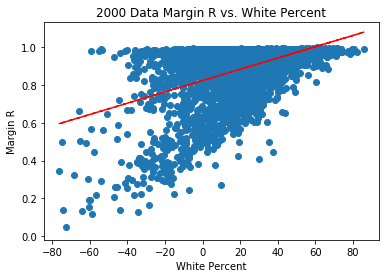

In [31]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# From allison - took away the tostring() to make it easier to read/scroll
print(data2000)

data2000y = data2000['whitePct2000']
data2000x = data2000['margin_R']

corrplot = plt.scatter(data2000x, data2000y)
plt.xlabel('White Percent')
plt.ylabel('Margin R')
plt.title('2000 Data Margin R vs. White Percent')
z = np.polyfit(data2000x, data2000y, 1)
p = np.poly1d(z)
plt.plot(data2000x, p(data2000x), "r--")

#For each year, compare how correlated vote shares (either R% - D% or D% - R%) correlate with county density 
#the % of white population over time. i.e. how well can a county's density or white demographic predict it's 
#electoral margin? Then check the correlations of each R-value over time to confirm our hypothesis.

       fips  margin_R  density2000  whitePct2000
0      1001     40.97    74.055071      0.810840
1      1003     47.59    88.906417      0.878217
2      1005      0.89    32.789905      0.521523
3      1007     22.01    31.984542      0.790187
4      1009     42.79    79.263186      0.973409
5      1011    -40.01    18.594905      0.255764
6      1013      6.68    27.451344      0.583400
7      1015     16.77   183.341916      0.794060
8      1017      3.55    61.306118      0.609417
9      1019      8.40    43.355608      0.932767
10     1021     34.86    57.583560      0.884076
11     1023     -1.45    17.378216      0.550110
12     1025     12.17    22.462484      0.559725
13     1027     28.46    23.615763      0.832153
14     1029     32.78    25.302625      0.952159
15     1031     30.57    64.185268      0.780610
16     1033     -0.11    92.803302      0.818572
17     1035     -1.52    16.508735      0.552120
18     1037      6.09    18.195617      0.655015
19     1039     33.2

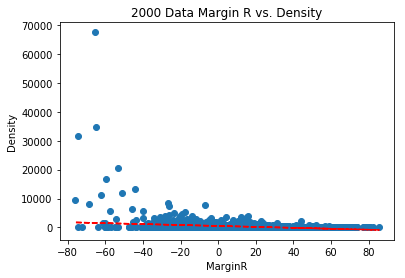

In [22]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# From allison - took away the tostring() to make it easier to read/scroll
print(data2000)

data2000y = data2000['density2000']
data2000x = data2000['margin_R']

corrplot2 = plt.scatter(data2000x, data2000y)
plt.xlabel('MarginR')
plt.ylabel('Density')
plt.title('2000 Data Margin R vs. Density')
z2 = np.polyfit(data2000x, data2000y, 1)
p2 = np.poly1d(z2)
plt.plot(data2000x, p2(data2000x), "r--")

#For each year, compare how correlated vote shares (either R% - D% or D% - R%) correlate with county density 
#the % of white population over time. i.e. how well can a county's density or white demographic predict it's 
#electoral margin? Then check the correlations of each R-value over time to confirm our hypothesis.

       fips  margin_R  density2004  whitePct2004
0      1001      52.0    81.364520      0.804139
1      1003      53.9    98.293856      0.877581
2      1005       9.9    31.967191      0.512780
3      1007      44.5    34.888577      0.770176
4      1009      62.6    83.942330      0.967353
5      1011     -36.4    17.751945      0.264743
6      1013      18.6    26.865629      0.570149
7      1015      32.6   187.271815      0.781477
8      1017      17.5    59.448713      0.600570
9      1019      31.9    44.946722      0.932897
10     1021      54.3    59.946251      0.883060
11     1023       8.2    16.343733      0.555928
12     1025      18.5    21.767268      0.557200
13     1027      41.5    23.380649      0.831811
14     1029      51.4    25.600786      0.950136
15     1031      48.5    66.354724      0.778883
16     1033      10.8    91.762161      0.819143
17     1035       9.1    15.797101      0.538719
18     1037      17.0    17.759315      0.656401
19     1039      52.

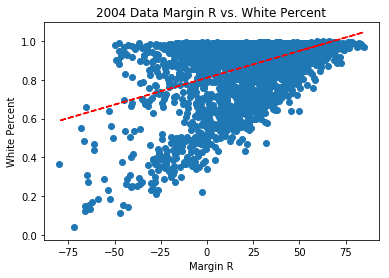

In [23]:
# From allison - took away the tostring() to make it easier to read/scroll
print(data2004)

data2004y = data2004['whitePct2004']
data2004x = data2004['margin_R']

corrplot3 = plt.scatter(data2004x, data2004y)
plt.ylabel('White Percent')
plt.xlabel('Margin R')
plt.title('2004 Data Margin R vs. White Percent')
z3 = np.polyfit(data2004x, data2004y, 1)
p3 = np.poly1d(z3)
plt.plot(data2004x, p3(data2004x), "r--")

       fips  margin_R  density2004  whitePct2004
0      1001      52.0    81.364520      0.804139
1      1003      53.9    98.293856      0.877581
2      1005       9.9    31.967191      0.512780
3      1007      44.5    34.888577      0.770176
4      1009      62.6    83.942330      0.967353
5      1011     -36.4    17.751945      0.264743
6      1013      18.6    26.865629      0.570149
7      1015      32.6   187.271815      0.781477
8      1017      17.5    59.448713      0.600570
9      1019      31.9    44.946722      0.932897
10     1021      54.3    59.946251      0.883060
11     1023       8.2    16.343733      0.555928
12     1025      18.5    21.767268      0.557200
13     1027      41.5    23.380649      0.831811
14     1029      51.4    25.600786      0.950136
15     1031      48.5    66.354724      0.778883
16     1033      10.8    91.762161      0.819143
17     1035       9.1    15.797101      0.538719
18     1037      17.0    17.759315      0.656401
19     1039      52.

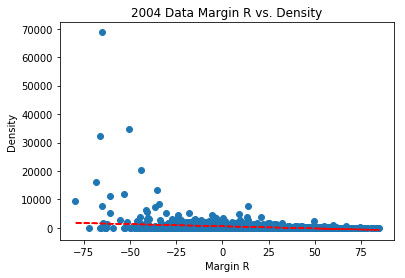

In [24]:
# From allison - took away the tostring() to make it easier to read/scroll
print(data2004)

data2004y = data2004['density2004']
data2004x = data2004['margin_R']

corrplot4 = plt.scatter(data2004x, data2004y)
plt.xlabel('Margin R')
plt.ylabel('Density')
plt.title('2004 Data Margin R vs. Density')
z4 = np.polyfit(data2004x, data2004y, 1)
p4 = np.poly1d(z4)
plt.plot(data2004x, p4(data2004x), "r--")

       fips  margin_R  density2008  whitePct2008
0      1001     47.80    89.626133      0.795071
1      1003     51.50   110.598044      0.877749
2      1005      1.40    31.425872      0.512119
3      1007     45.80    36.469092      0.766087
4      1009     69.50    88.488095      0.966366
5      1011    -48.40    17.586564      0.265407
6      1013     13.40    26.967325      0.547854
7      1015     32.50   193.563615      0.767493
8      1017      8.40    57.939990      0.593351
9      1019     51.20    46.299440      0.931542
10     1021     57.80    62.407087      0.882259
11     1023      7.40    15.450465      0.552784
12     1025     11.60    21.222239      0.549405
13     1027     47.30    23.446878      0.825719
14     1029     62.40    26.555972      0.950249
15     1031     48.90    71.455082      0.775847
16     1033     20.20    91.919091      0.816790
17     1035      0.60    15.747698      0.521138
18     1037     17.50    17.656385      0.661620
19     1039     58.3

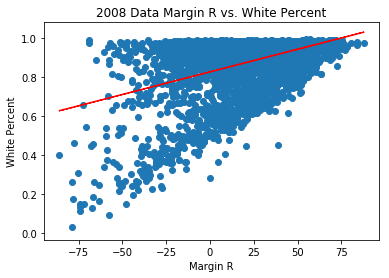

In [25]:
# From allison - took away the tostring() to make it easier to read/scroll
print(data2008)

data2008y = data2008['whitePct2008']
data2008x = data2008['margin_R']

corrplot5 = plt.scatter(data2008x, data2008y)
plt.ylabel('White Percent')
plt.xlabel('Margin R')
plt.title('2008 Data Margin R vs. White Percent')
z5 = np.polyfit(data2008x, data2008y, 1)
p5 = np.poly1d(z5)
plt.plot(data2008x, p5(data2008x), "r--")

       fips  margin_R  density2008  whitePct2008
0      1001     47.80    89.626133      0.795071
1      1003     51.50   110.598044      0.877749
2      1005      1.40    31.425872      0.512119
3      1007     45.80    36.469092      0.766087
4      1009     69.50    88.488095      0.966366
5      1011    -48.40    17.586564      0.265407
6      1013     13.40    26.967325      0.547854
7      1015     32.50   193.563615      0.767493
8      1017      8.40    57.939990      0.593351
9      1019     51.20    46.299440      0.931542
10     1021     57.80    62.407087      0.882259
11     1023      7.40    15.450465      0.552784
12     1025     11.60    21.222239      0.549405
13     1027     47.30    23.446878      0.825719
14     1029     62.40    26.555972      0.950249
15     1031     48.90    71.455082      0.775847
16     1033     20.20    91.919091      0.816790
17     1035      0.60    15.747698      0.521138
18     1037     17.50    17.656385      0.661620
19     1039     58.3

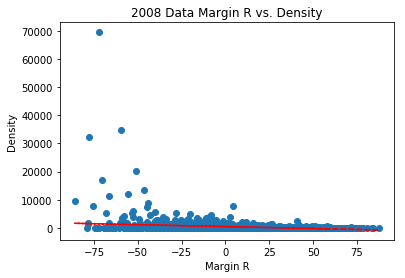

In [26]:
# From allison - took away the tostring() to make it easier to read/scroll
print(data2008)

data2008y = data2008['density2008']
data2008x = data2008['margin_R']

corrplot6 = plt.scatter(data2008x, data2008y)
plt.xlabel('Margin R')
plt.ylabel('Density')
plt.title('2008 Data Margin R vs. Density')
z6 = np.polyfit(data2008x, data2008y, 1)
p6 = np.poly1d(z6)
plt.plot(data2008x, p6(data2008x), "r--")

       fips  margin_R  density2012  whitePct2012
0      1001     45.95    92.401873      0.788064
1      1003     55.82   119.543284      0.874358
2      1005     -3.14    30.710518      0.504287
3      1007     46.68    36.393600      0.768294
4      1009     73.93    89.325595      0.962393
5      1011    -52.80    17.039041      0.271202
6      1013      7.51    26.631344      0.542053
7      1015     31.95   193.472836      0.761634
8      1017      5.16    57.150425      0.588379
9      1019     54.88    46.880982      0.931736
10     1021     60.25    62.929564      0.877962
11     1023      4.59    14.845101      0.561389
12     1025      8.20    20.309012      0.544529
13     1027     45.51    22.243158      0.832366
14     1029     68.06    26.582753      0.948485
15     1031     49.14    75.279982      0.768396
16     1033     20.34    92.081084      0.809929
17     1035     -1.65    15.339538      0.516218
18     1037     16.24    17.432089      0.663788
19     1039     58.2

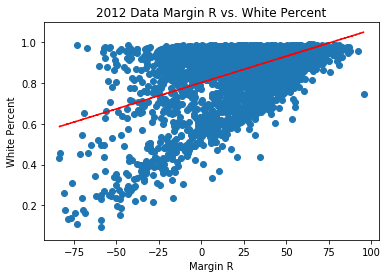

In [27]:
# From allison - took away the tostring() to make it easier to read/scroll
print(data2012)

data2012y = data2012['whitePct2012']
data2012x = data2012['margin_R']

corrplot7 = plt.scatter(data2012x, data2012y)
plt.ylabel('White Percent')
plt.xlabel('Margin R')
plt.title('2012 Data Margin R vs. White Percent')
z7 = np.polyfit(data2012x, data2012y, 1)
p7 = np.poly1d(z7)
plt.plot(data2012x, p7(data2012x), "r--")

       fips  margin_R  density2012  whitePct2012
0      1001     45.95    92.401873      0.788064
1      1003     55.82   119.543284      0.874358
2      1005     -3.14    30.710518      0.504287
3      1007     46.68    36.393600      0.768294
4      1009     73.93    89.325595      0.962393
5      1011    -52.80    17.039041      0.271202
6      1013      7.51    26.631344      0.542053
7      1015     31.95   193.472836      0.761634
8      1017      5.16    57.150425      0.588379
9      1019     54.88    46.880982      0.931736
10     1021     60.25    62.929564      0.877962
11     1023      4.59    14.845101      0.561389
12     1025      8.20    20.309012      0.544529
13     1027     45.51    22.243158      0.832366
14     1029     68.06    26.582753      0.948485
15     1031     49.14    75.279982      0.768396
16     1033     20.34    92.081084      0.809929
17     1035     -1.65    15.339538      0.516218
18     1037     16.24    17.432089      0.663788
19     1039     58.2

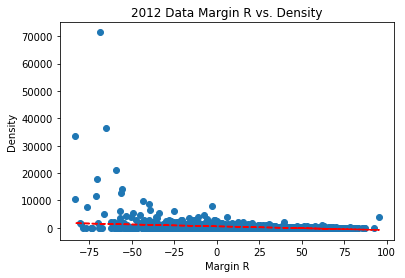

In [28]:
# From allison - took away the tostring() to make it easier to read/scroll
print(data2012)

data2012y = data2012['density2012']
data2012x = data2012['margin_R']

corrplot8 = plt.scatter(data2012x, data2012y)
plt.xlabel('Margin R')
plt.ylabel('Density')
plt.title('2012 Data Margin R vs. Density')
z8 = np.polyfit(data2012x, data2012y, 1)
p8 = np.poly1d(z8)
plt.plot(data2012x, p8(data2012x), "r--")

       fips   margin_R  density2016  whitePct2016
28     1001  49.478934    92.992349      0.771953
29     1003  57.786162   130.526537      0.871702
30     1005   5.611165    29.127245      0.496857
31     1007  55.544124    36.353444      0.766624
32     1009  81.381973    89.274415      0.960217
33     1011 -50.861519    16.764477      0.265683
34     1013  13.529073    25.700637      0.528525
35     1015  41.383823   189.777311      0.755227
36     1017  14.806213    56.521790      0.574517
37     1019  69.361135    46.534224      0.930645
38     1021  66.606409    63.260081      0.872051
39     1023  13.662631    14.285714      0.572337
40     1025  10.799320    19.661436      0.537536
41     1027  60.803408    22.203420      0.829978
42     1029  77.372933    26.554187      0.948363
43     1031  56.700629    75.433155      0.759806
44     1033  38.260375    91.672727      0.808014
45     1035   5.257527    14.720828      0.509469
46     1037  30.557151    16.605574      0.669442


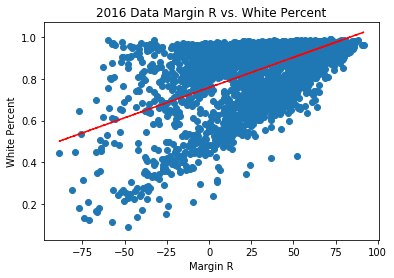

In [29]:
#From allison - i took away the tostring() to make it easier to scroll
print(data2016)


data2016y = data2016['whitePct2016']
data2016x = data2016['margin_R']

corrplot9 = plt.scatter(data2016x, data2016y)
plt.ylabel('White Percent')
plt.xlabel('Margin R')
plt.title('2016 Data Margin R vs. White Percent')
z9 = np.polyfit(data2016x, data2016y, 1)
p9 = np.poly1d(z9)
plt.plot(data2016x, p9(data2016x), "r--")

       fips   margin_R  density2016  whitePct2016
28     1001  49.478934    92.992349      0.771953
29     1003  57.786162   130.526537      0.871702
30     1005   5.611165    29.127245      0.496857
31     1007  55.544124    36.353444      0.766624
32     1009  81.381973    89.274415      0.960217
33     1011 -50.861519    16.764477      0.265683
34     1013  13.529073    25.700637      0.528525
35     1015  41.383823   189.777311      0.755227
36     1017  14.806213    56.521790      0.574517
37     1019  69.361135    46.534224      0.930645
38     1021  66.606409    63.260081      0.872051
39     1023  13.662631    14.285714      0.572337
40     1025  10.799320    19.661436      0.537536
41     1027  60.803408    22.203420      0.829978
42     1029  77.372933    26.554187      0.948363
43     1031  56.700629    75.433155      0.759806
44     1033  38.260375    91.672727      0.808014
45     1035   5.257527    14.720828      0.509469
46     1037  30.557151    16.605574      0.669442


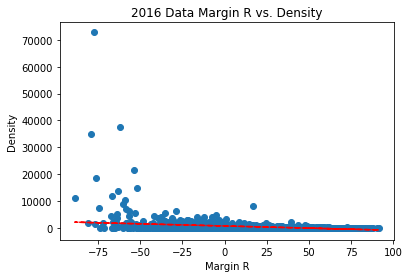

In [30]:
#From allison - i took away the tostring() to make it easier to scroll
print(data2016)

data2016y = data2016['density2016']
data2016x = data2016['margin_R']

corrplot10 = plt.scatter(data2016x, data2016y)
plt.xlabel('Margin R')
plt.ylabel('Density')
plt.title('2016 Data Margin R vs. Density')
z10 = np.polyfit(data2016x, data2016y, 1)
p10 = np.poly1d(z10)
plt.plot(data2016x, p10(data2016x), "r--")

# Ethics & Privacy

One major ethical consideration is that individual voter data and voter records are private & confidential. However, we are using population metrics, which do not single out specific voters, so the issue of voter privacy is less pressing. 

The other major ethical issue to take into account is how these data can be used in the future, considering the prevalence of gerrymandering in this country. The more that lawmakers know about the voting patterns of specific counties, the more they can change county lines to maximize the likelihood of members of their party being elected.

# Conclusion & Discussion

*Fill in your discussion information here*